#tesla stock prediction(regression)

In [ ]:
!pip install chart-studio
!pip install plotly --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio
import plotly.graph_objects as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

# standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
tesla = pd.read_csv('/content/tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
# converting data from string to datetime
tesla['Date'] = pd.to_datetime(tesla['Date'])

<ipython-input-67-ac06f00e40cb>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
print(f'dataset contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

dataset contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


<Axes: >

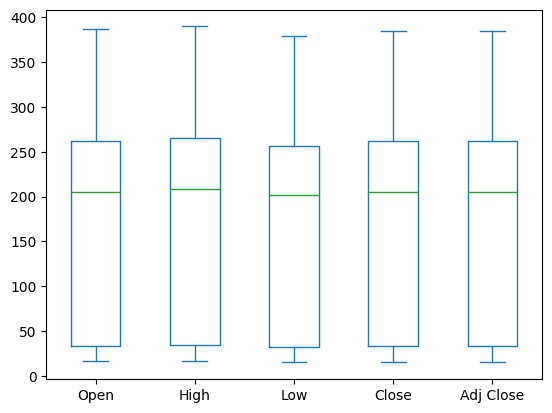

In [ ]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [ ]:
plot.show(renderer="colab") # ther's no need to specify renderer if you don't
# plan to run it on colab

In [ ]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
rm = LinearRegression()

In [ ]:
#fitting data into the regression model, rm
rm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
actual_trace = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'actual'
)
predicted_trace = go.Scatter(
    x = X_train.T[0],
    y = rm.predict(X_train).T,
    mode = 'lines',
    name = 'predicted'
)
tesla_data = [actual_trace, predicted_trace]
layout.xaxis.title.text = 'day'
new_plot = go.Figure(data=tesla_data, layout=layout)

In [ ]:
new_plot.show(renderer="colab")

In [ ]:
#model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, rm.predict(X_train))}\t{r2_score(Y_test, rm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, rm.predict(X_train))}\t{mse(Y_test, rm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8675885930199759	0.8548552193708869
MSE       1777.0054580956796	1908.6806659524789

